In [8]:
import pandas as pd
import numpy as np

percent_qqqm = 0.35
percent_voo = 0.35
percent_vxus = 0.15
percent_avuv = 0.15

# From time to time, portfolio should be rebalanced, so the ratio of holdings will stay within limit. 
# In this case, rebalancing is performed without selling any positions, to avoid taxation (no seeling = no tax) #

# Data Import, later can be improved by using API #
etf_port = pd.read_csv(r'C:\Users\sasha\Documents\etf_portfolio_rebalancing.csv', sep = ';')

# Renaming columns to make it more organized #

etf_port = etf_port.rename(columns = {'n_shares' : 'n_shares_now', 'value' : 'value_now', 'port_percent': 'port_percent_now'})

# Deleting an empty row #
etf_port = etf_port.drop(etf_port.index[-1])

# Adding one more column, the percent of the portfolio for each position that I want to get as a result of rebalancing
etf_port.loc[etf_port['etf_ticker'].isin(['QQQM', 'VOO']), 'port_percent_needed'] = percent_voo
etf_port.loc[etf_port['etf_ticker'].isin(['VXUS', 'AVUV']), 'port_percent_needed'] = percent_vxus

# Calculates the value of the portfolio at the moment #
value_ttl_now = etf_port['value_now'].sum()

# Calculates the value of the portfolio after the rebalancing #
max_value_row = etf_port.loc[etf_port['value_now'].idxmax()]
value_ttl_needed = max_value_row['value_now'] / max_value_row['port_percent_needed']

# Calculating the value of all position in the rebalanced portfolio #
etf_port['value_needed'] = value_ttl_needed * etf_port['port_percent_needed']

# Calculating the amount that have to be bought #
etf_port['change_value'] = etf_port['value_needed'] - etf_port['value_now']

# Calculating the number of shares that have to be bought #
etf_port['n_shares_change'] = etf_port['change_value'] / etf_port['price'] 

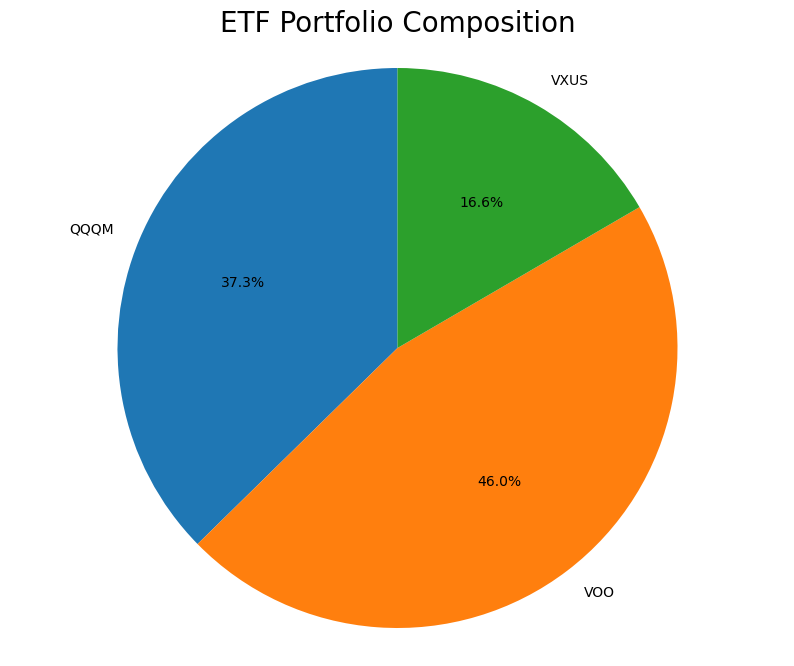

In [6]:
# Portfolio composition before rebalancing #
import matplotlib.pyplot as plt

etf_port2 = pd.read_csv(r'C:\Users\sasha\Documents\etf_portfolio_rebalancing.csv', sep = ';')

etf_port2 = etf_port.drop(etf_port.index[-1])

plt.figure(figsize = (10, 8))
plt.pie(etf_port2['port_percent'], labels = etf_port2['etf_ticker'], autopct='%1.1f%%', startangle = 90)
plt.axis('equal')
plt.title('ETF Portfolio Composition', size = 20)
plt.show()

In [9]:
etf_port

,etf_ticker,price,n_shares_now,value_now,port_percent_now,port_percent_needed,value_needed,change_value,n_shares_change
0,QQQM,250.99,1.0,250.99,0.326,0.35,308.830000,57.840000,0.230447
1,VOO,617.66,0.5,308.83,0.402,0.35,308.830000,0.000000,0.000000
2,VXUS,74.58,1.5,111.87,0.145,0.15,132.355714,20.485714,0.274681
3,AVUV,97.29,1.0,97.29,0.127,0.15,132.355714,35.065714,0.360425
